# NOT IMPLEMENTED

Might combine explore and cleaning

In [ ]:
# CMDs for visualisation


# 




In [ ]:
# usage: specify file location
filepath = '../Data_git_ignore/1mio-raw.csv'
# filepath = '../Data_git_ignore/clean-100k.csv'

# Create df for the entire file
entire_df = pd.read_csv(filepath, index_col = [0])

In [2]:
import psycopg2
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np  
import random
import pandas as pd
import seaborn as sns

In [7]:
def execQuery(query):
    try:
        connection = psycopg2.connect(user = "postgres",
                                      password = "root",
                                      host = "localhost",
                                      port = "5432",
                                      database = "exploration_small")
        cursor = connection.cursor()
        cursor.execute(query)
        record = cursor.fetchall()
        return record
    except (Exception, psycopg2.Error) as error :
        connection = False
        print ("Error while connecting to PostgreSQL", error)
    finally:
        if(connection):
            cursor.close()
            connection.close()
            print("Executed query and closed connection.")

In [4]:
#Domains with fake articles after 2018-01-15
execQuery(
"""
SELECT DISTINCT domain_name.domain_name FROM fakenews.domain_name
INNER JOIN fakenews.article
ON article.domain_id = domain_name.domain_id
WHERE article.type_id = '7' and scraped_at >= '2018-01-15'

""")

Executed query and closed connection.


[('thefreethoughtproject.com',),
 ('theduran.com',),
 ('theantimedia.org',),
 ('veteransnewsnow.com',),
 ('conservativeoutfitters.com',),
 ('ahtribune.com',),
 ('guccifer2.wordpress.com',),
 ('ifyouonlynews.com',),
 ('coasttocoastam.com',),
 ('madworldnews.com',),
 ('anonews.co',),
 ('blackagendareport.com',),
 ('awm.com',),
 ('wikileaks.org',),
 ('shareblue.com',),
 ('weaselzippers.us',),
 ('anonhq.com',),
 ('breakpoint.org',),
 ('allnewspipeline.com',),
 ('cnnnext.com',),
 ('jewsnews.co.il',),
 ('wikileaks.com',)]

In [29]:
execQuery(
"""
Select COUNT(authorid), domain_name
from 


""")

Executed query and closed connection.


[(Decimal('211'),)]

In [2]:
conn = psycopg2.connect(database='Database1', user ='postgres',password='detminkode', host ='localhost', port='5432')

In [3]:
q4_1 = """SELECT sum(length(content))/COUNT(id) as AvgLen, type
from article
Inner join type
ON article.type_id = type.type_id
GROUP BY type
ORDER BY AvgLen ASC """

In [9]:
q4_1

'Select Count(id)\nfrom article'

In [4]:
df = pd.read_sql_query(q4_1, conn)
df

,avglen,type
0,334,hate
1,1711,clickbait
2,1869,unreliable
3,2603,reliable
4,2655,None
5,2719,bias
6,2779,junksci
7,3977,political
8,3993,fake
9,4958,conspiracy


In [5]:
#test dataframe
df1 = pd.DataFrame()

df1['x'] = random.sample(range(1, 100), 25)
df1['y'] = random.sample(range(1, 100), 25)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

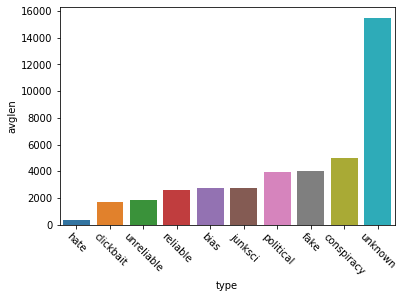

In [15]:
sns.barplot(x='type', y='avglen', data=df)
plt.xticks(rotation = -45)

In [9]:
contentLength = execQuery("""
SELECT array_agg(LENGTH(content)), type_id FROM fakenews.article
GROUP BY type_id
""")

Executed query and closed connection.


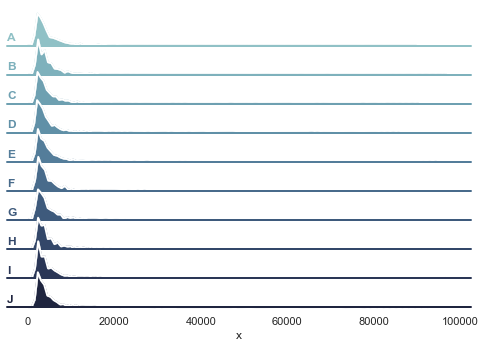

In [15]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
x = contentLength[0][0] + contentLength[1][0] + contentLength[2][0] + contentLength[3][0] + contentLength[4][0] + contentLength[5][0] + contentLength[6][0] + contentLength[7][0] + contentLength[8][0] + contentLength[9][0]
g = np.tile(list("ABCDEFGHIJ"), 2500)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [17]:
countCom = execQuery("""
SELECT type_id, COUNT(url) FROM fakenews.article
WHERE url LIKE '%.com%'
GROUP BY type_id
""")

Executed query and closed connection.


In [18]:
countCom

[(8, 2326),
 (7, 335),
 (9, 2170),
 (1, 2105),
 (5, 1541),
 (4, 2149),
 (2, 2260),
 (6, 1778),
 (0, 2462),
 (3, 2352)]

In [26]:
countOrg = execQuery("""
SELECT type_id, COUNT(url) FROM fakenews.article
WHERE url LIKE '%.org%'
GROUP BY type_id
""")

Executed query and closed connection.


In [27]:
countOrg

[(8, 205),
 (9, 330),
 (7, 2150),
 (1, 5),
 (5, 933),
 (2, 125),
 (4, 243),
 (6, 722),
 (3, 83)]

In [29]:
countOrgNorCom = execQuery("""
SELECT type_id, COUNT(url) FROM fakenews.article
WHERE url NOT LIKE '%.org%' AND url NOT LIKE '%.com%'
GROUP BY type_id
""")

Executed query and closed connection.


In [30]:
countOrgNorCom

[(7, 15), (1, 390), (5, 26), (4, 108), (2, 115), (0, 38), (3, 92)]

In [31]:
postedArticleAmountByOutlet = execQuery("""
SELECT regexp_matches(url, 'https?://(?:www\.)?(.+?)/.*') AS outlets, COUNT(type_id) FROM fakenews.article
GROUP BY outlets
ORDER BY count DESC
""")

Executed query and closed connection.


In [34]:
postedArticleAmountByOutlet[0: 10]

[(['beforeitsnews.com'], 2397),
 (['wikileaks.org'], 2135),
 (['christianpost.com'], 1806),
 (['us.blastingnews.com'], 1764),
 (['dailykos.com'], 1243),
 (['naturalnews.com'], 1225),
 (['abovetopsecret.com'], 953),
 (['drrichswier.com'], 859),
 (['lifesitenews.com'], 794),
 (['nationalvanguard.org'], 721)]

In [ ]:
postedArticleAmountByOutlet = execQuery("""
SELECT regexp_matches(url, 'https?://(?:www\.)?(.+?)/.*') AS outlets, COUNT(type_id) FROM fakenews.article
GROUP BY outlets
ORDER BY count DESC
""")

In [35]:
hasHTTPS = execQuery("""
SELECT COUNT(*), fakenews.type.type FROM fakenews.article
inner join fakenews.type
ON fakenews.type.type_id = fakenews.article.type_id
WHERE url LIKE 'https%'
GROUP BY fakenews.type.type_id
""")

Executed query and closed connection.


In [37]:
hasHTTPS

[(2403, 'reliable'),
 (914, 'conspiracy'),
 (1108, 'hate'),
 (1709, 'junksci'),
 (76, 'fake'),
 (1360, 'clickbait'),
 (1346, 'bias'),
 (2350, 'unreliable'),
 (288, 'satire'),
 (1836, 'political')]

In [39]:
hasHTTP = execQuery("""
SELECT COUNT(*), fakenews.type.type FROM fakenews.article
inner join fakenews.type
ON fakenews.type.type_id = fakenews.article.type_id
WHERE url NOT LIKE 'https%'
GROUP BY fakenews.type.type_id
""")

Executed query and closed connection.


In [40]:
hasHTTP

[(97, 'reliable'),
 (1586, 'conspiracy'),
 (1392, 'hate'),
 (791, 'junksci'),
 (2424, 'fake'),
 (1140, 'clickbait'),
 (1154, 'bias'),
 (150, 'unreliable'),
 (2212, 'satire'),
 (664, 'political')]

In [74]:
t = [hasHTTP[0][0]] + [hasHTTP[1][0]] + [hasHTTP[2][0]] + [hasHTTP[3][0]] + [hasHTTP[4][0]] + [hasHTTP[5][0]] + [hasHTTP[6][0]] + [hasHTTP[7][0]] + [hasHTTP[8][0]] + [hasHTTP[9][0]]
ts = [hasHTTPS[0][0]] + [hasHTTPS[1][0]] + [hasHTTPS[2][0]] + [hasHTTPS[3][0]] + [hasHTTPS[4][0]] + [hasHTTPS[5][0]] + [hasHTTPS[6][0]] + [hasHTTPS[7][0]] + [hasHTTPS[8][0]] + [hasHTTPS[9][0]]

header = [hasHTTPS[0][1]] + [hasHTTPS[1][1]] + [hasHTTPS[2][1]] + [hasHTTPS[3][1]] + [hasHTTPS[4][1]] + [hasHTTPS[5][1]] + [hasHTTPS[6][1]] + [hasHTTPS[7][1]] + [hasHTTPS[8][1]] + [hasHTTPS[9][1]]

In [87]:
hasHTTP[0][1]

'reliable'

In [89]:
test

{'reliable': [2403, 97],
 'https': [2403, 914, 1108, 1709, 76, 1360, 1346, 2350, 288, 1836]}

In [90]:
test = {hasHTTPS[0][1]: [hasHTTPS[0][0]] + [hasHTTP[0][0]], hasHTTPS[1][1]: [hasHTTPS[1][0]] + [hasHTTP[1][0]], hasHTTPS[2][1]: [hasHTTPS[2][0]] + [hasHTTP[2][0]], hasHTTPS[3][1]: [hasHTTPS[3][0]] + [hasHTTP[3][0]], hasHTTPS[4][1]: [hasHTTPS[4][0]] + [hasHTTP[4][0]], hasHTTPS[5][1]: [hasHTTPS[5][0]] + [hasHTTP[5][0]], hasHTTPS[6][1]: [hasHTTPS[6][0]] + [hasHTTP[6][0]], hasHTTPS[7][1]: [hasHTTPS[7][0]] + [hasHTTP[7][0]], hasHTTPS[8][1]: [hasHTTPS[8][0]] + [hasHTTP[8][0]], hasHTTPS[9][1]: [hasHTTPS[9][0]] + [hasHTTP[9][0]]}

describe_df = pd.DataFrame(test, columns = header)

,reliable,conspiracy,hate,junksci,fake,clickbait,bias,unreliable,satire,political
0,2403,914,1108,1709,76,1360,1346,2350,288,1836
1,97,1586,1392,791,2424,1140,1154,150,2212,664


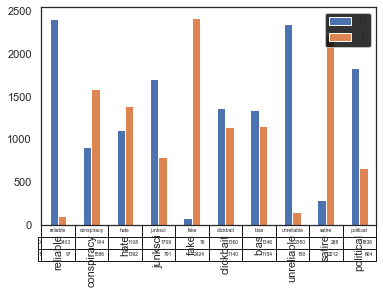

In [92]:
# Calculating number: count, unique for each column

describe_df = pd.DataFrame(test, columns = header)

# plot orange is number of http and blue id number of https urls
describe_df.T.plot(kind='bar',  table=True)
describe_df # just display numbers

In [91]:
describe_df

,reliable,conspiracy,hate,junksci,fake,clickbait,bias,unreliable,satire,political
0,2403,914,1108,1709,76,1360,1346,2350,288,1836
1,97,1586,1392,791,2424,1140,1154,150,2212,664
